In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
imgpoints = []

In [3]:
fname = '/home/shankha/MuralPlot/calib.jpeg'
img = cv2.imread(fname)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
print(corners)

[[[ 164.4155426    50.64908981]]

 [[ 182.9577179    50.94229126]]

 [[ 201.57415771   50.46179199]]

 [[ 220.59408569   50.484272  ]]

 [[ 239.4324646    50.15606308]]

 [[ 258.13012695   49.60702133]]

 [[ 276.95001221   49.65349197]]

 [[ 165.03286743   69.53565979]]

 [[ 183.47366333   69.38213348]]

 [[ 201.68136597   69.15111542]]

 [[ 221.25238037   69.06374359]]

 [[ 239.48861694   68.91695404]]

 [[ 258.26470947   68.80951691]]

 [[ 277.45727539   68.5820694 ]]

 [[ 165.24291992   88.34287262]]

 [[ 183.47213745   88.02065277]]

 [[ 201.97862244   87.66357422]]

 [[ 221.04605103   87.4828949 ]]

 [[ 239.93759155   87.46927643]]

 [[ 258.65127563   87.24063873]]

 [[ 277.48989868   86.9642334 ]]

 [[ 165.0647583   106.80670929]]

 [[ 183.6701355   106.6496048 ]]

 [[ 202.55291748  106.6461792 ]]

 [[ 221.09143066  106.33720398]]

 [[ 239.78488159  106.0153656 ]]

 [[ 258.75006104  106.06556702]]

 [[ 278.17526245  105.73215485]]

 [[ 165.05474854  125.76197815]]

 [[ 183.614852

In [5]:
corners2=cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
imgpoints.append(corners)

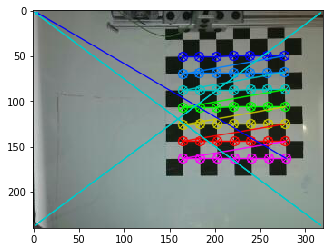

In [6]:
cv2.drawChessboardCorners(img, (7,10), corners2, ret)
plt.imshow(img)

In [ ]:
#th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15, 3)
#plt.imshow(th3, cmap=plt.cm.binary)

In [7]:
rng = [0,6, 63,69]
rng = range(len(corners))
x_values = [corners[i][0][0] for i in rng]
y_values = [corners[i][0][1] for i in rng]

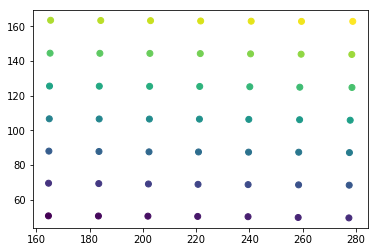

In [8]:
plt.scatter(x_values, y_values, c=range(len(x_values)))

In [114]:
src_pts = np.array([p[0] for p in corners])
dst_pts = []
for x in range(1, 8):
    for y in range(-2,5):
        dst_pts.append([x*100-1, (7-y)*100-1])
dst_pts = np.array(dst_pts)

In [115]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

In [121]:
im_out = cv2.warpPerspective(img, M, (1000,1000))

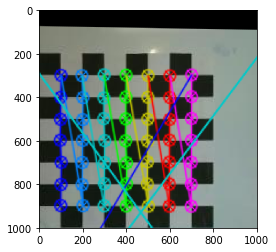

In [122]:
plt.imshow(im_out)

In [120]:
M

array([[  6.65711273e-02,   5.47559773e+00,  -1.89238360e+02],
       [ -5.39128636e+00,   1.01174157e-01,   1.79414588e+03],
       [  6.35660769e-05,   8.09843393e-05,   1.00000000e+00]])

In [125]:
img.shape

(240, 320, 3)